<a href="https://colab.research.google.com/github/darthkenobi5319/Data-Driven-Decision-Making/blob/master/DDDMProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA


In [0]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/darthkenobi5319/Data-Driven-Decision-Making/master/Project/FinalProjectTrain.csv'
df1 = pd.read_csv(url)

In [0]:
import warnings
warnings.filterwarnings(action='once')

In [0]:
df1.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,7524,59,technician,married,secondary,no,0,no,no,cellular,29,aug,2,-1,0,unknown,no
1,4777,31,technician,single,tertiary,no,454,no,no,cellular,30,apr,1,-1,0,unknown,yes
2,1041,34,admin.,single,tertiary,no,4254,yes,no,cellular,21,nov,1,-1,0,unknown,yes
3,3137,33,technician,married,secondary,no,303,yes,no,cellular,3,feb,1,301,5,success,yes
4,2829,38,blue-collar,single,secondary,no,0,no,no,cellular,27,oct,1,75,3,failure,yes


In [0]:
df1.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

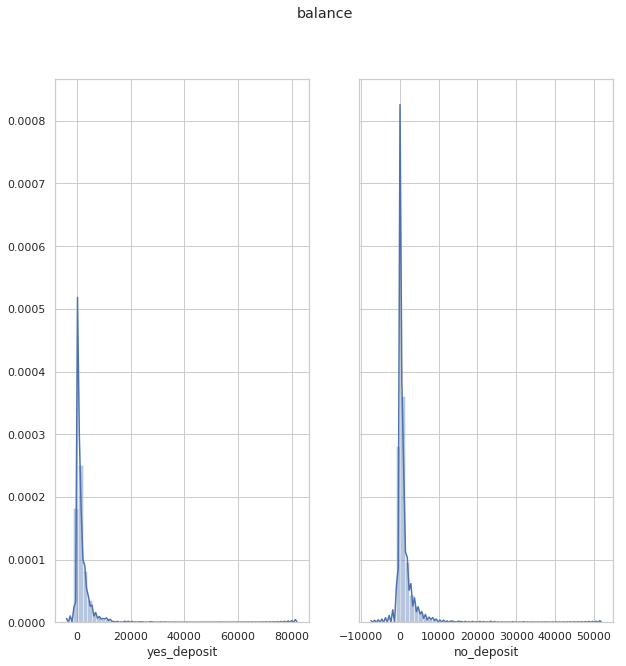

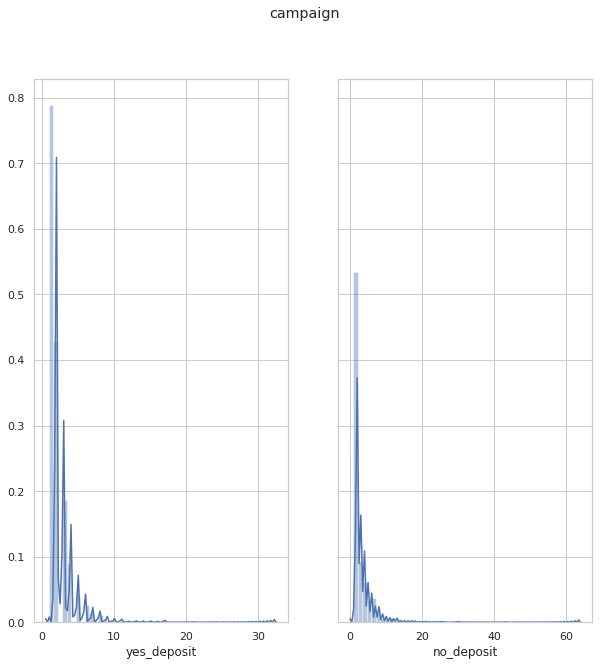

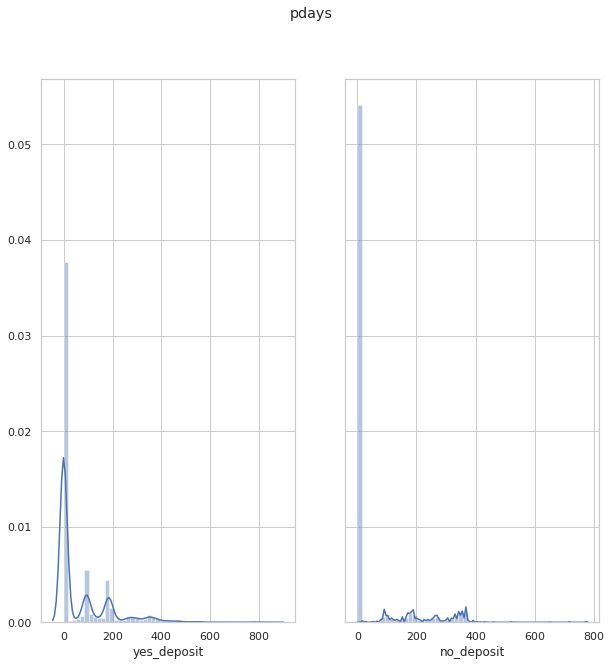

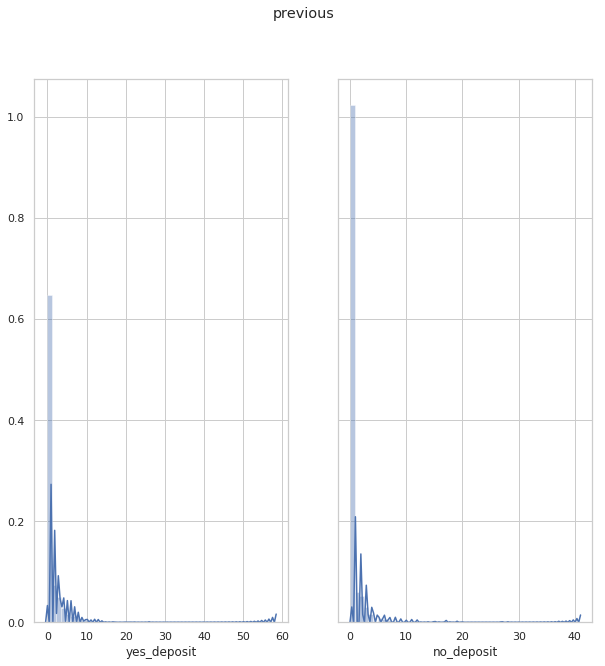

In [0]:
categorical = ['job', 'marital', 'education', 'default','day','month', 'housing', 'loan', 'contact', 'poutcome']
numeric = ['balance','campaign', 'pdays', 'previous']
for i in numeric:
    sns.set(style="whitegrid")
    yes = df1.groupby('deposit').get_group("yes")
    no = df1.groupby('deposit').get_group("no")
    f, axes = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
    f.suptitle(i)
    yes_array = pd.Series(list(yes[i]), name="yes_deposit")
    no_array = pd.Series(list(no[i]), name="no_deposit")
    sns.distplot(yes_array,ax = axes[0])
    sns.distplot(no_array,ax = axes[1])


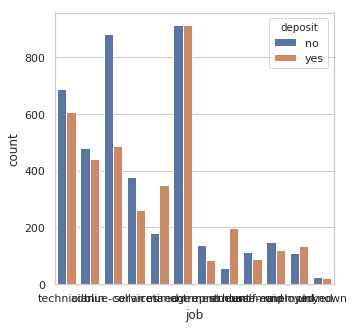

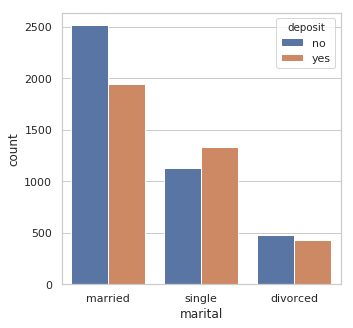

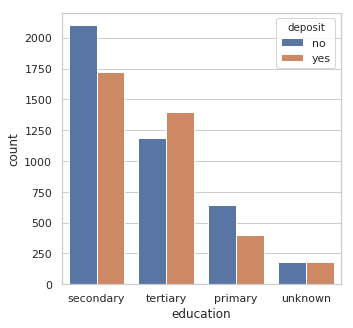

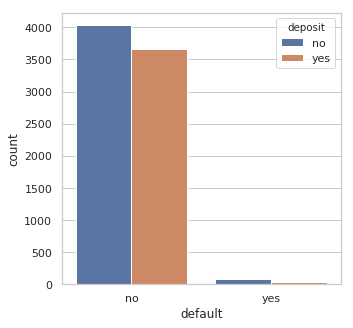

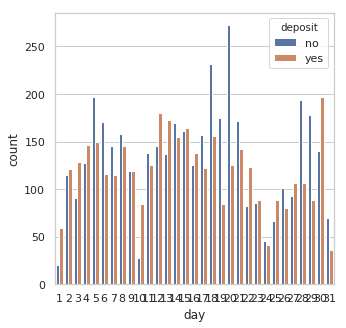

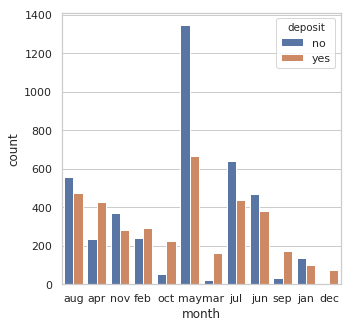

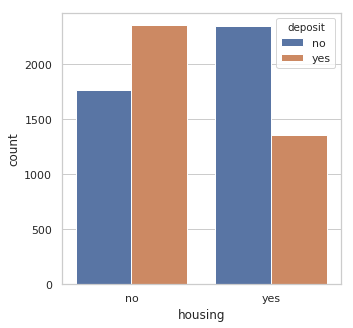

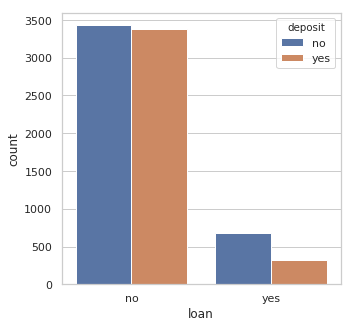

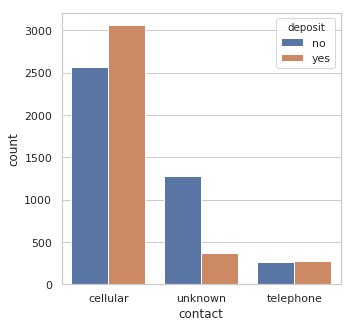

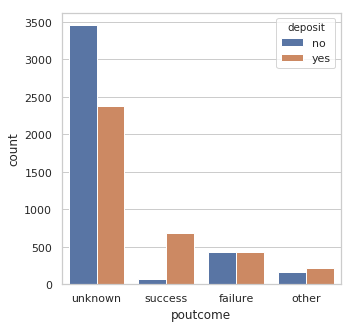

In [0]:
for j in categorical:
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax = sns.countplot(x = j,hue = "deposit", data=df1)

In [0]:
#Seperate the dataset(Stacking)

df_1 = df1[['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit']]

df_prevCont = df_1[df_1['pdays'] != -1]
df_prevNotCont = df_1[df_1['pdays'] == -1]

In [0]:
print(df_prevCont.shape)
print(df_prevNotCont.shape)

(1988, 15)
(5825, 15)


In [0]:
X_prev = pd.get_dummies(data= df_prevCont, columns=['job', 'marital', 'education', 'default','month', 'housing', 'loan', 'contact', 'poutcome'],drop_first = True).drop(['deposit'],axis=1)
X_prevNot = pd.get_dummies(data= df_prevNotCont, columns=['job', 'marital', 'education', 'default','month', 'housing', 'loan', 'contact', 'poutcome'],drop_first = True).drop(['deposit','pdays'],axis=1)
y_prev = df_prevCont['deposit']
y_prevNot = df_prevNotCont['deposit']

In [0]:
X_prev.head()

,age,balance,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
3,33,303,1,301,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,38,0,1,75,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10,43,386,1,92,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
11,28,113,3,105,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,59,2769,1,131,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_prev,y_prev.ravel(),test_size=0.30)

In [0]:
!pip install git+https://github.com/scikit-learn-contrib/stability-selection.git

  Cloning https://github.com/scikit-learn-contrib/stability-selection.git to /tmp/pip-req-build-mubli8lg
  Running command git clone -q https://github.com/scikit-learn-contrib/stability-selection.git /tmp/pip-req-build-mubli8lg
  Created wheel for stability-selection: filename=stability_selection-0.0.1-cp36-none-any.whl size=14463 sha256=ce58318d68b7b9bbe6eeec1c374f1a6e4353127a7f1dad5d1344039c33358a72
  Stored in directory: /tmp/pip-ephem-wheel-cache-d43j1hyg/wheels/58/be/39/79880712b91ffa56e341ff10586a1956527813437ddd759473
Successfully built stability-selection


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.utils import check_random_state
from stability_selection import StabilitySelection

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# Logistic Regression
# For previouly contacted customers



# Feature Selection
base_estimator = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(solver = 'lbfgs',penalty='l2'))
])

## Here stability selection is instantiated and run
selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__C',
                              lambda_grid=np.logspace(-5, -1, 50)).fit(x_train1, y_train1)

print(selector.get_support(indices=True))

[ 0  1  2  3  5 14 18 19 22 24 25 26 27 28 29 30 32 33 34 38]


In [0]:
x_train1.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [0]:
feature_selected = np.array(selector.get_support(indices=True))

In [0]:
# selected features
features = list()
for i in range(len(list(x_train1.columns))):
  if i in feature_selected:
    features.append(list(x_train1.columns)[i])
print(features)

['age', 'balance', 'campaign', 'pdays', 'job_blue-collar', 'job_unemployed', 'education_secondary', 'education_tertiary', 'month_aug', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_sep', 'housing_yes', 'loan_yes', 'poutcome_success']


In [0]:
x_train_new = x_train1[features]
x_train_new.head()

,age,balance,campaign,pdays,job_blue-collar,job_unemployed,education_secondary,education_tertiary,month_aug,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_sep,housing_yes,loan_yes,poutcome_success
5241,60,2060,1,88,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1597,59,1,2,378,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1934,36,1133,1,181,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
6116,40,334,1,91,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7742,39,0,2,307,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [0]:
x_test_new = x_test1[features]
x_test_new.head()

,age,balance,campaign,pdays,job_blue-collar,job_unemployed,education_secondary,education_tertiary,month_aug,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_sep,housing_yes,loan_yes,poutcome_success
1041,34,1636,1,521,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0
6635,36,828,1,345,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1415,28,54,1,371,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6489,44,36,1,371,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5139,31,459,1,293,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [0]:
from sklearn.model_selection import GridSearchCV
scale = RobustScaler().fit(x_train_new)
x_train_new = scale.transform(x_train_new)
x_test_new = scale.transform(x_test_new)

param_test = {
        'C':np.logspace(-5, -1, 50)
    }

estimator = LogisticRegression(solver='lbfgs',max_iter = 10000)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train_new,y_train1)
print(gsearch.best_params_)



{'C': 0.1}


In [0]:
from sklearn.metrics import accuracy_score
# fit a model with optimal parameters
# calculate the score
clf = LogisticRegression(C = gsearch.best_params_['C'],solver='lbfgs',max_iter = 10000)
clf.fit(x_train_new,y_train1)
y_pred = clf.predict(x_test_new)
accuracy_score(y_test1,y_pred)

0.7872696817420436

In [0]:
# Now we do the same for not contacted
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_prevNot,y_prevNot.ravel(),test_size=0.30)
# Feature Selection
base_estimator = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(solver = 'lbfgs',penalty='l2'))
])

## Here stability selection is instantiated and run
selector = StabilitySelection(base_estimator=base_estimator, lambda_name='model__C',
                              lambda_grid=np.logspace(-5, -1, 50)).fit(x_train2, y_train2)
features_selected = selector.get_support(indices=True)
print(features_selected)

[ 1  2  4  8 11 15 16 18 21 22 24 25 27 28 29 30 31 32 33 35]


In [0]:
# selected features
features = list()
for i in range(len(list(x_train2.columns))):
  if i in features_selected:
    features.append(list(x_train2.columns)[i])
print(features)

['balance', 'campaign', 'job_blue-collar', 'job_retired', 'job_student', 'marital_married', 'marital_single', 'education_tertiary', 'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'housing_yes', 'loan_yes', 'contact_unknown']


In [0]:
x_train2_new = x_train2[features]
x_train2_new.head()
x_test2_new = x_test2[features]
x_test2_new.head()

,balance,campaign,job_blue-collar,job_retired,job_student,marital_married,marital_single,education_tertiary,month_aug,month_dec,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,housing_yes,loan_yes,contact_unknown
7541,126,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1283,91,3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
5780,486,5,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7664,1435,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
5451,334,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [0]:
print(X_prevNot.shape)
print(X_prev.shape)

(5825, 36)
(1988, 40)


In [0]:
scale = RobustScaler().fit(x_train2_new)
x_train2_new = scale.transform(x_train2_new)
x_test2_new = scale.transform(x_test2_new)

param_test = {
        'C':np.logspace(-5, -1, 50)
    }

estimator = LogisticRegression(solver='lbfgs',max_iter = 10000)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train2_new,y_train2)
print(gsearch.best_params_)
# fit a model with optimal parameters
# calculate the score
clf = LogisticRegression(C = gsearch.best_params_['C'],solver='lbfgs',max_iter = 10000)
clf.fit(x_train2_new,y_train2)
y_pred = clf.predict(x_test2_new)
accuracy_score(y_test2,y_pred)

{'C': 0.05689866029018293}


0.6967963386727689

In [0]:
# Weighted Average Accuracy Score
((0.6967963386727689 * 5825) + (0.7872696817420436*1988))/(5825+1988)

0.7198170741164803

**The accuracy for a logistic regression is about 72% on  average. But for previously contacted customers, the accuracy is about 79%**




**SVM**

**DO NOT RUN THIS CODE!**

In [0]:
# For previously contacted customers 

In [0]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_prev,y_prev.ravel(),test_size=0.30)
scale = RobustScaler().fit(x_train1)
x_train1_new = scale.transform(x_train1)
x_test1_new = scale.transform(x_test1)

from sklearn.svm import SVC
param_test = {
        'C':np.logspace(-5, 0, 20)
    }

estimator = SVC(kernel = 'rbf',gamma = 'auto')
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train1_new,y_train1)
print(gsearch.best_params_)

{'C': 1.0}


**DO NOT RUN THIS CODE!**

In [0]:
clf = SVC(C = gsearch.best_params_['C'],kernel = 'rbf',gamma = 'auto')
clf.fit(x_train1_new,y_train1)
y_pred = clf.predict(x_test1_new)
accuracy_score(y_test1,y_pred)

0.7755443886097152

In [0]:
# For not previously contacted customers
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_prevNot,y_prevNot.ravel(),test_size=0.30)

scale = RobustScaler().fit(x_train2)
x_train2_new = scale.transform(x_train2)
x_test2_new = scale.transform(x_test2)

from sklearn.svm import SVC
param_test = {
        'C':np.logspace(-5, 0, 20)
    }

estimator = SVC(kernel = 'rbf',gamma = 'auto')
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train2_new,y_train2)
print(gsearch.best_params_)

{'C': 0.5455594781168515}


In [0]:
clf = SVC(C = gsearch.best_params_['C'],kernel = 'rbf',gamma = 'auto')
clf.fit(x_train2_new,y_train2)
y_pred = clf.predict(x_test2_new)
accuracy_score(y_test2,y_pred)

0.6973684210526315

In [0]:
# Weighted Average Accuracy Score
((0.6973684210526315 * 5825) + (0.7755443886097152*1988))/(5825+1988)

0.7172601173925115

**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

X = pd.get_dummies(data= df_1, columns=['job', 'marital', 'education', 'default','month', 'housing', 'loan', 'contact', 'poutcome'],drop_first = True).drop(['deposit'],axis=1)
y = df_1['deposit']
x_train, x_test, y_train, y_test = train_test_split(X_prevNot,y_prevNot.ravel(),test_size=0.30)

param_test = {
        'max_depth': [2,3,4,5,6]
    }

estimator = DecisionTreeClassifier(random_state = 0)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train,y_train)
print(gsearch.best_params_)

{'max_depth': 6}


In [0]:
clf = DecisionTreeClassifier(max_depth = gsearch.best_params_['max_depth'],random_state = 0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6390160183066361

**Attempt to better the result**

In [0]:
# For previously contacted
param_test = {
        'max_depth': [2,3,4,5,6]
    }

estimator = DecisionTreeClassifier(random_state = 0)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train1,y_train1)
print(gsearch.best_params_)
clf = DecisionTreeClassifier(max_depth = gsearch.best_params_['max_depth'],random_state = 0)
clf.fit(x_train1,y_train1)
y_pred = clf.predict(x_test1)
accuracy_score(y_test1,y_pred)

{'max_depth': 4}


0.7604690117252931

In [0]:
# For not previously contacted
param_test = {
        'max_depth': [2,3,4,5,6]
    }

estimator = DecisionTreeClassifier(random_state = 0)
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train2,y_train2)
print(gsearch.best_params_)
clf = DecisionTreeClassifier(max_depth = gsearch.best_params_['max_depth'],random_state = 0)
clf.fit(x_train2,y_train2)
y_pred = clf.predict(x_test2)
accuracy_score(y_test2,y_pred)

{'max_depth': 6}


0.6710526315789473

In [0]:
# Weighted Average Accuracy Score
((0.6710526315789473 * 5825) + (0.7604690117252931*1988))/(5825+1988)

0.6938044252217139

**This is still better than before**

**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

# grid search
param_test = {
    'n_estimators':[10,50,100,200],
    'max_depth':[2,3,4,5,6]
    }
estimator = RandomForestClassifier()
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train,y_train)
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


best score is: 0.6970811871474123
best params are: {'max_depth': 6, 'n_estimators': 200}


In [0]:
# fit a model with optimal parameters

clf = RandomForestClassifier(max_depth = gsearch.best_params_['max_depth'], n_estimators = gsearch.best_params_['n_estimators'])
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6853546910755148

**Accuracy seems decent. What if we seperate the dataset?**

In [0]:
# grid search
param_test = {
    'n_estimators':[10,50,100,200],
    'max_depth':[2,3,4,5,6]
    }
estimator = RandomForestClassifier()
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train1,y_train1)
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.7649173256649893
best params are: {'max_depth': 6, 'n_estimators': 50}


In [0]:
# fit a model with optimal parameters

clf = RandomForestClassifier(max_depth = gsearch.best_params_['max_depth'], n_estimators = gsearch.best_params_['n_estimators'])
clf.fit(x_train1,y_train1)
y_pred = clf.predict(x_test1)
accuracy_score(y_test1,y_pred)

0.7721943048576214

In [0]:
# grid search
param_test = {
    'n_estimators':[10,50,100,200],
    'max_depth':[2,3,4,5,6]
    }
estimator = RandomForestClassifier()
gsearch = GridSearchCV(estimator, param_grid = param_test, cv=10)
gsearch.fit(x_train2,y_train2)
print('best score is:',str(gsearch.best_score_))
print('best params are:',str(gsearch.best_params_))

best score is: 0.6853078243806721
best params are: {'max_depth': 6, 'n_estimators': 200}


In [0]:
# fit a model with optimal parameters

clf = RandomForestClassifier(max_depth = gsearch.best_params_['max_depth'], n_estimators = gsearch.best_params_['n_estimators'])
clf.fit(x_train2,y_train2)
y_pred = clf.predict(x_test2)
accuracy_score(y_test2,y_pred)

0.6967963386727689

In [0]:
# Weighted Average Accuracy Score
((0.6967963386727689 * 5825) + (0.7721943048576214*1988))/(5825+1988)

0.7159811789102561

**Again, we can see that even the random forest model performs better when we seperate the dataset.**

**GBDT**

**MLP/Neural Network**

**Helper Function**

In [0]:
# This function prepares the prediction dataset by seperating previously contacted and previously not contacted customers
# @param:  trainingData1: X of previously contacted customers
#          trainingData2: X of previously not contacted customers
#          newData: the dataset to scale and seperate
# @return: two dataframes
def prepareData(x_train1,x_train2,newData):
  newData_1 = newData[['age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit']]
  
  
  
  newData_prevCont = newData_1[newData_1['pdays'] != -1]
  x_pred1 = pd.get_dummies(data= newData_prevCont, columns=['job', 'marital', 'education', 'default','month', 'housing', 'loan', 'contact', 'poutcome'],drop_first = True)
  scale = RobustScaler().fit(x_train1)
  x_pred1_new = scale.transform(x_pred1)
  
  
  newData_prevNotCont = newData_1[newData_1['pdays'] == -1]
  x_pred2 = pd.get_dummies(data= newData_prevNotCont, columns=['job', 'marital', 'education', 'default','month', 'housing', 'loan', 'contact', 'poutcome'],drop_first = True).drop(['pdays'],axis=1)
  scale = RobustScaler().fit(x_train2)
  x_pred2_new = scale.transform(x_pred2)
  
  return x_pred1_new,x_pred2_new
  